In [1]:
import splitfolders

In [2]:
splitfolders.ratio("Soil_Dataset/Train", output="Soil_Dataset/data/", seed=1337, ratio=(.8, .2), group_prefix=None) 

In [3]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from keras import layers
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import load_img , img_to_array , ImageDataGenerator

In [5]:
SoilType = ['Alluvial_Soil', 'Black_Soil', 'Clay_Soil', 'Red_Soil']

DATA_PATH = 'Soil_Dataset/'

In [6]:
#import train data
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.3,
                                   zoom_range = 0.3,horizontal_flip = True,
                                   vertical_flip =  True ,
                                   rotation_range=60)


train_data = train_datagen.flow_from_directory(DATA_PATH+'train',
                                                 target_size = (244, 244),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)

Found 715 images belonging to 4 classes.


In [7]:
#import val data

val_datagen = ImageDataGenerator(rescale = 1/255)
val_data = val_datagen.flow_from_directory(DATA_PATH+'data/val',
                                                           target_size=(244,244),
                                                           class_mode='sparse',
                                                           shuffle=True,seed=1)

Found 144 images belonging to 4 classes.


In [8]:
# import test data


test_datagen = ImageDataGenerator(rescale = 1/255)
test_data = test_datagen.flow_from_directory(DATA_PATH+'Test',
                                                           target_size=(244,244),
                                                           class_mode='sparse',
                                                           shuffle=False,seed=1)

Found 188 images belonging to 4 classes.


In [9]:
# Defining Cnn
model = tf.keras.models.Sequential([
  layers.Conv2D(32, 3, activation='relu',input_shape=(244,244,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(4, activation= 'softmax')
])

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [12]:
history = model.fit(train_data, validation_data= val_data, batch_size=32, epochs = 100, callbacks=[early])

Epoch 1/100
23/23 [==============================] - 50s 2s/step - loss: 2.0201 - accuracy: 0.4280 - val_loss: 0.8999 - val_accuracy: 0.7431
Epoch 2/100
23/23 [==============================] - 43s 2s/step - loss: 0.5968 - accuracy: 0.7385 - val_loss: 0.4638 - val_accuracy: 0.7639
Epoch 3/100
23/23 [==============================] - 42s 2s/step - loss: 0.3902 - accuracy: 0.8126 - val_loss: 0.2931 - val_accuracy: 0.8681
Epoch 4/100
23/23 [==============================] - 41s 2s/step - loss: 0.3146 - accuracy: 0.8629 - val_loss: 0.4833 - val_accuracy: 0.8681
Epoch 5/100
23/23 [==============================] - 40s 2s/step - loss: 0.3183 - accuracy: 0.8811 - val_loss: 0.2128 - val_accuracy: 0.9306
Epoch 6/100
23/23 [==============================] - 40s 2s/step - loss: 0.2692 - accuracy: 0.8909 - val_loss: 0.2581 - val_accuracy: 0.8958
Epoch 7/100
23/23 [==============================] - 49s 2s/step - loss: 0.2930 - accuracy: 0.8811 - val_loss: 0.1765 - val_accuracy: 0.9514
Epoch 8/100
2

In [13]:
model.evaluate(test_data)

6/6 [==============================] - 5s 876ms/step - loss: 0.2373 - accuracy: 0.9149


[0.23725448548793793, 0.914893627166748]

In [14]:
y_pred =  model.predict(test_data)
y_pred =  np.argmax(y_pred,axis=1)
len(test_data)
test_data.classes
y_pred

array([0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3], dtype=int64)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [16]:
def plot_confusion_matrix (cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[39  2  7  0]
 [ 2 44  1  0]
 [ 1  1 45  0]
 [ 2  0  0 44]]


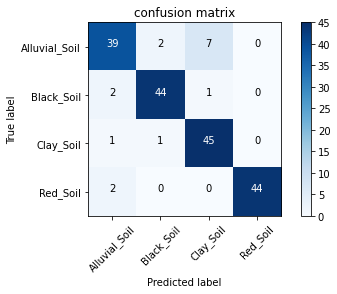

In [17]:
import itertools
cm = confusion_matrix(y_true = test_data.classes, y_pred = y_pred)
plot_confusion_matrix(cm, SoilType, title= 'confusion matrix')

In [18]:
print(classification_report(test_data.classes, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        48
           1       0.94      0.94      0.94        47
           2       0.85      0.96      0.90        47
           3       1.00      0.96      0.98        46

    accuracy                           0.91       188
   macro avg       0.92      0.92      0.92       188
weighted avg       0.92      0.91      0.91       188



In [19]:
model.save('models/soil_model_25_March.h5')

In [20]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

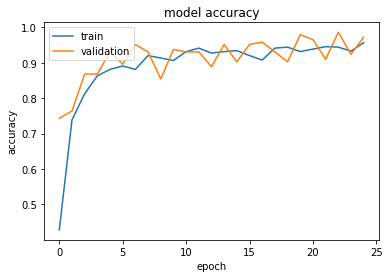

In [21]:
plot_hist(history)

In [22]:
def plot_hist_loss(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

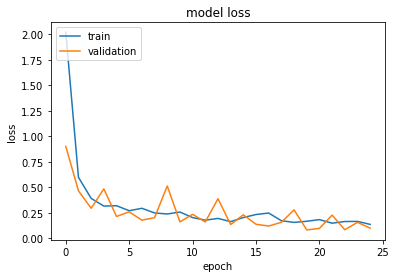

In [23]:
plot_hist_loss(history)